In [100]:
# part one: using the elbow method to compute the best value of k in knn clustering

# load the sklearn iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [101]:
# showing some basic info. about the dataset
print(iris.DESCR)
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [102]:
# creating the kmeans object (just to show normal operation)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=42)
# fit the model
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=42)

In [103]:
# now we want to use the elbow method to find a good value of k that gets the most from the incrased k

kmIneReadings = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(iris.data)
  kmIneReadings.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

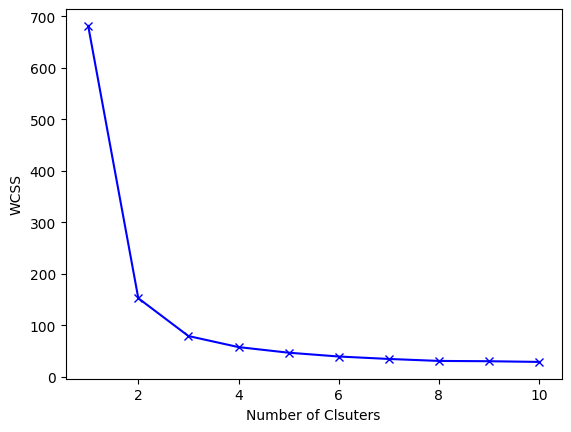

In [104]:
# we use matplot to display the result
import matplotlib.pyplot as plt

plt.plot(range(1,11),kmIneReadings,'bx-')
plt.xlabel('Number of Clsuters')
plt.ylabel('WCSS')

In [105]:
# part two: MNIST dataset. using PCA dim. reduc.

# import the MNIST dataset
from sklearn.datasets import fetch_openml
nmistData,nmistTarget = fetch_openml('mnist_784', version=1, return_X_y=True)

In [106]:
# std the data
from sklearn.preprocessing import StandardScaler
stdData = StandardScaler().fit_transform(nmistData)


In [107]:
print(stdData.shape)

(70000, 784)


In [108]:
# apply pca to data
from sklearn.decomposition import PCA
pca = PCA(0.95)

pca_nmist_data = pca.fit_transform(stdData)


In [109]:
print(pca_nmist_data.shape)

(70000, 332)


In [110]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(stdData,nmistTarget,random_state=42)
pca_x_train,pca_x_test, pca_y_train,pca_y_test = train_test_split(pca_nmist_data,nmistTarget,random_state=42)


In [111]:
# view the sizes of the train dataset
print(x_train.shape)
print(pca_x_train.shape)

(52500, 784)
(52500, 332)


In [112]:
# perform logstic regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver='lbfgs',max_iter=1000)
pcaLogReg = LogisticRegression(solver='lbfgs',max_iter=1000)

In [113]:
# fitting the models
%%time
logReg.fit(X=x_train,y=y_train)

# with no PCA, we have a user time of 2min, 5 sec.

CPU times: user 2min 5s, sys: 390 ms, total: 2min 6s
Wall time: 1min 15s


LogisticRegression(max_iter=1000)

In [114]:
%%time
pcaLogReg.fit(X=pca_x_train,y=pca_y_train)

# with PCS, we have a user time of 1min, 21 sec.

CPU times: user 1min 21s, sys: 107 ms, total: 1min 21s
Wall time: 47 s


LogisticRegression(max_iter=1000)

In [117]:
# testing the models so we can view results
regularScore = logReg.score(x_test,y_test)
pcaScore = pcaLogReg.score(pca_x_test,pca_y_test)

In [121]:
print("Non-PCA log. reg. finished with a score of {}%".format(regularScore*100))
print("PCA log. reg. finished with a score of {}%".format(pcaScore*100))

Non-PCA log. reg. finished with a score of 91.62285714285714%
PCA log. reg. finished with a score of 92.24%


In [ ]:
# final thoughts:
# PCA log. reg. reduced the running time (no surpises there), and also appears to have increased slighty accuracy
# the main advantage was in the running time